# n차원 배열의 선형 대수학
https://numpy.org/numpy-tutorials/content/tutorial-svd.html

## 학습목표
- NumPy에서 1차원, 2차원 및 n차원 배열의 차이점을 이해합니다.
- for 루프를 사용하지 않고 n차원 배열에 일부 선형 대수 연산을 적용하는 방법을 이해합니다.
- n차원 배열의 축 및 모양 속성을 이해합니다.

## content

In [1]:
from scipy import misc

In [2]:
img = misc.face()

In [15]:
import matplotlib.pyplot as plt
# 차트같은 거 그려주는게 matplotlib

In [16]:
# %matplotlib inline
# 셀에서 이미지 출력하기 위한.. 최신버전은 안 써도 됨

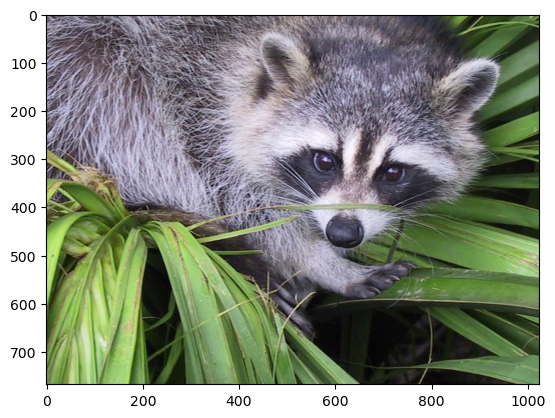

In [17]:
plt.imshow(img)
plt.show()
# 이건 같은 셀에 써주는 게 좋음
# 실제로는 img라는 array 값인데 show로 보여줌

### 모양, 축 및 배열 속성 : Shape, axis and array properties

In [4]:
img.ndim

3

In [5]:
img.shape
# 배열의 모양을 확인. 1024행 3열짜리가 768개. 1024*768 픽셀의 이미지

(768, 1024, 3)

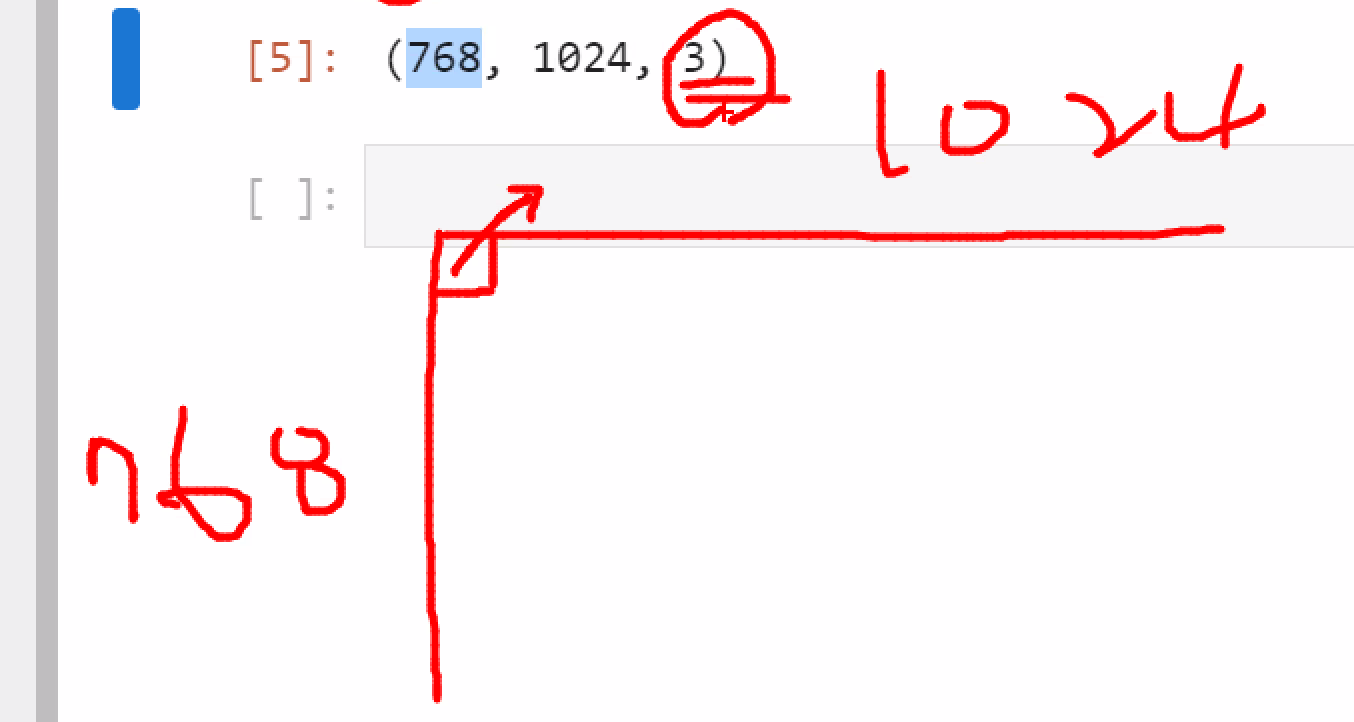

In [7]:
img.size

2359296

In [9]:
img.dtype

dtype('uint8')

In [10]:
type(img)

numpy.ndarray

In [18]:
img [0,:,:]

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [119, 126,  74],
       [131, 136,  82],
       [139, 144,  90]], dtype=uint8)

In [13]:
img.max()

255

In [19]:
img.min()

0

In [21]:
img[:,:,0]
# R 값

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [23]:
img[:,:,1]
# G 값

array([[112, 129, 144, ..., 126, 136, 144],
       [ 82, 103, 122, ..., 125, 141, 153],
       [ 66,  87, 108, ..., 126, 142, 153],
       ...,
       [106, 110, 124, ..., 158, 157, 158],
       [101, 111, 127, ..., 157, 156, 156],
       [101, 113, 126, ..., 156, 155, 154]], dtype=uint8)

In [25]:
img_array = img / 255
# 0~255값을 0~1 사이 값으로 조정

In [28]:
img_array.max(), img_array.min()

(1.0, 0.0)

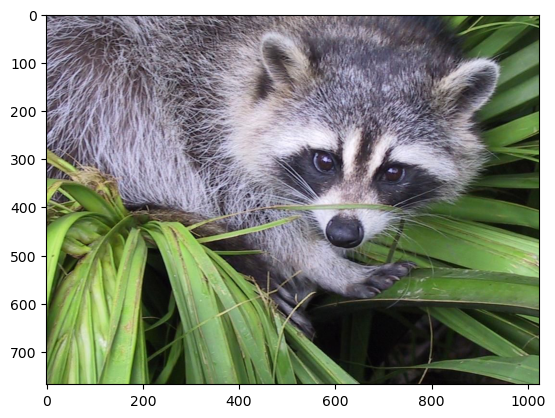

In [30]:
plt.imshow(img_array)
plt.show()
# 왜지????????????????????? 왜 똑같지??? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이해가 안되네
# RGB가 수치가 아니고 비율이라.. 똑같은 수로 나눠도 되는 거였어

In [34]:
img_array.dtype

dtype('float64')

In [36]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]
# R, G, B 값 따로 추출

In [37]:
red_array

array([[0.4745098 , 0.54117647, 0.6       , ..., 0.46666667, 0.51372549,
        0.54509804],
       [0.34901961, 0.43137255, 0.50980392, ..., 0.4627451 , 0.5254902 ,
        0.57254902],
       [0.28627451, 0.36862745, 0.45098039, ..., 0.45882353, 0.52156863,
        0.56470588],
       ...,
       [0.34117647, 0.36862745, 0.41960784, ..., 0.47058824, 0.46666667,
        0.46666667],
       [0.33333333, 0.37254902, 0.43921569, ..., 0.4745098 , 0.47058824,
        0.47058824],
       [0.33333333, 0.38039216, 0.43529412, ..., 0.47058824, 0.46666667,
        0.4627451 ]])

### 축 작업 : Operations on an axis
특잇값 분해 SVD(Singular Value Decomposition) 를 이용
행렬을 특정한 구조로 분해하는 것

특잇값 분해
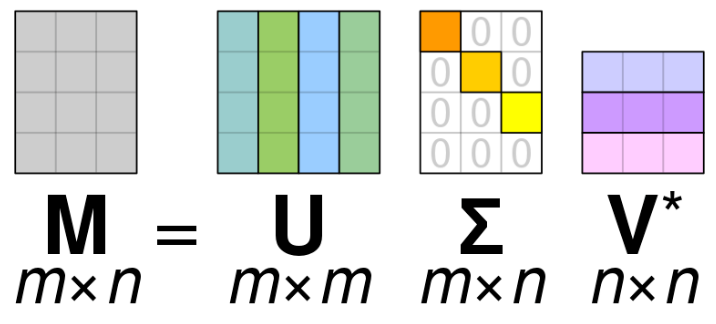
- U는 m × m 크기를 가지는 유니터리 행렬이다.
- Sigma 는 m × n 크기를 가지며, 대각선상에 있는 원소의 값은 음수가 아니며 나머지 원소의 값이 모두 0인 대각행렬이다.
- V*는 V의 켤레전치 행렬로, n × n 유니터리 행렬이다.

특이값분해로 나눠진 행렬을 다시 곱하면 원래 행렬이 나온다????

In [39]:
from numpy import linalg

> Y = 0.2126R + 0.7152G + 0.0722B  

RGB를 흑백으로 바꾸는 일종의 공식.. 

행렬곱
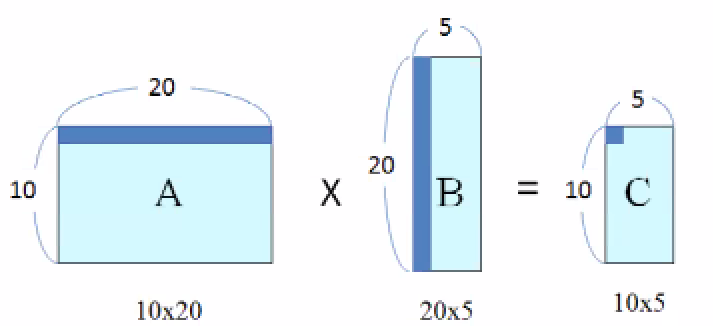
앞쪽의 열값과 뒤쪽의 행값은 같아야함  
A 20*10  
B 5*20  
20이 같아야함  
A * B 하면 5*10 나옴 ???

In [40]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# @는 행렬을 곱할때 쓰는 연산자

In [41]:
img_gray.shape

(768, 1024)

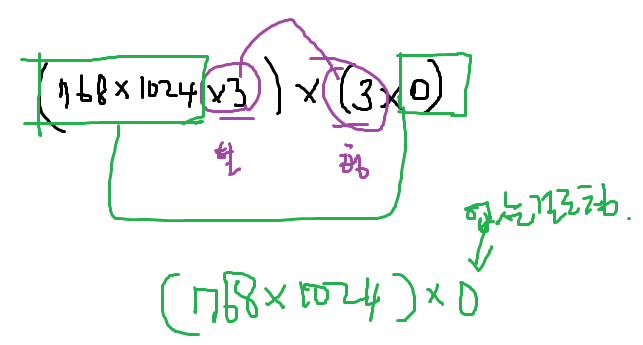

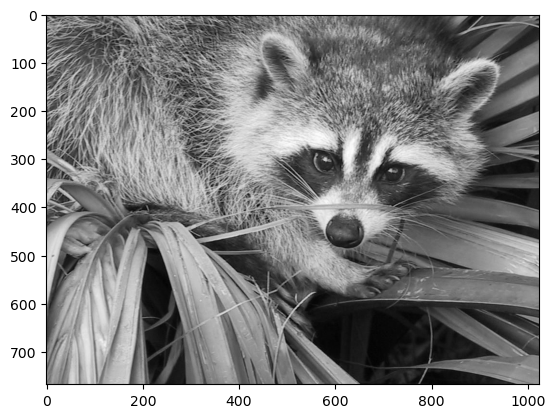

In [43]:
plt.imshow(img_gray, cmap='gray')
plt.show()

In [44]:
# 특잇값 분해
U, s, Vt = linalg.svd(img_gray)

In [45]:
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [47]:
U @ s

array([-14.82934258, -15.64213083, -14.11270338, -11.83441097,
       -11.22274112, -12.0353505 , -13.47822804, -14.71083649,
       -12.81620569, -14.75900199, -16.39875751, -15.92262872,
       -14.2169179 , -15.3288541 , -14.70930414, -12.08341602,
       -13.22480892, -17.99291819, -18.52242787, -16.64750177,
       -15.22914737, -13.38720335, -10.1227432 ,  -7.90847967,
        -9.96630176, -12.48284105,  -8.99099249,  -6.41657917,
        -9.19740108, -11.01006464,  -9.07085404,  -7.4107021 ,
        -8.52112075,  -8.63687911,  -9.4459556 , -11.50462072,
       -13.96566515, -13.98513718, -11.50377238,  -9.98170743,
        -6.604055  ,  -6.3496544 ,  -7.7850486 , -10.14026006,
       -10.39553704,  -8.22701164,  -6.10672313,  -5.54959637,
        -6.85210974,  -9.68592061, -10.1594951 ,  -8.12163263,
        -7.79271711,  -9.71728949,  -9.69867931,  -7.43358508,
        -6.53419533,  -9.5636305 , -13.01997283, -14.45013707,
       -14.2560003 , -12.80652392, -11.85222051, -12.46

In [48]:
s @ Vt
# (768,), (1024, 1024)로 값이 안 맞아서 계산이 안 됨

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 768)

In [49]:
import numpy as np

In [50]:
Sigma = np.zeros((U.shape[1],Vt.shape[0]))
# ((768, 이거랑 768), (768,), (이거 1024, 1024)) 아니 꼭 이거일 필요는 없댜
Sigma.shape

(768, 1024)

In [52]:
np.fill_diagonal(Sigma, s)
Sigma
# 0으로 만들어진.... 배열에.........s값을..채우는 거......? 곱할 수 있게

array([[410.42098224,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  85.56090199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  63.61066707, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [53]:
U @ Sigma @ Vt

array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]])

## 근사치 : Approximation
분해했다 재조립한 게 원래 거랑 얼마나 같은지 확인

In [54]:
linalg.norm(img_gray - U @ Sigma @ Vt)
# 차이값 구하는 함수. 작을수록 근사치... 차이가 작은지 큰지도 모르겠닼ㅋㅋㅋㅋㅋㅋㅋㅋㅋ

1.4108253216554015e-12

In [57]:
np.allclose(img_gray, U @ Sigma @ Vt)
# 차이값 구하는 함수, True 나오면 차이가 없다고 봄

True

<function matplotlib.pyplot.show(close=None, block=None)>

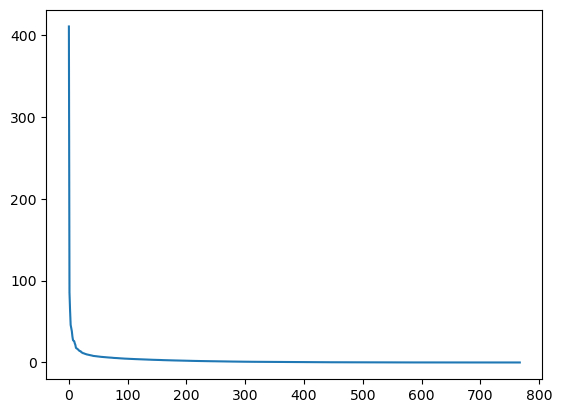

In [58]:
plt.plot(s)
plt.show
# 앞부분에만 값이 있고 뒤에는 없다(0이다)

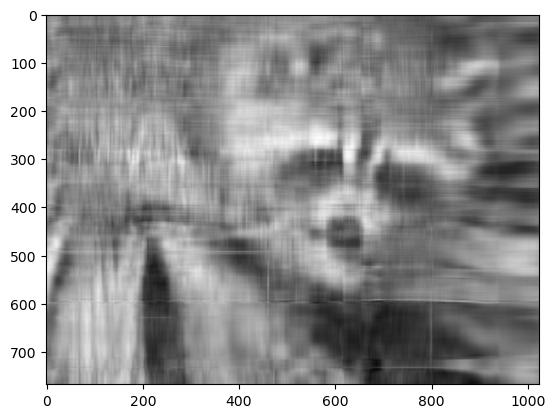

In [63]:
k = 10
approx = U @ Sigma[:,:k] @ Vt[:k, :]
plt.imshow(approx,cmap='gray')
plt.show()
# 모든 데이터가 있어야 복구가 되는 건 아니다 (데이터 손실은 있다)

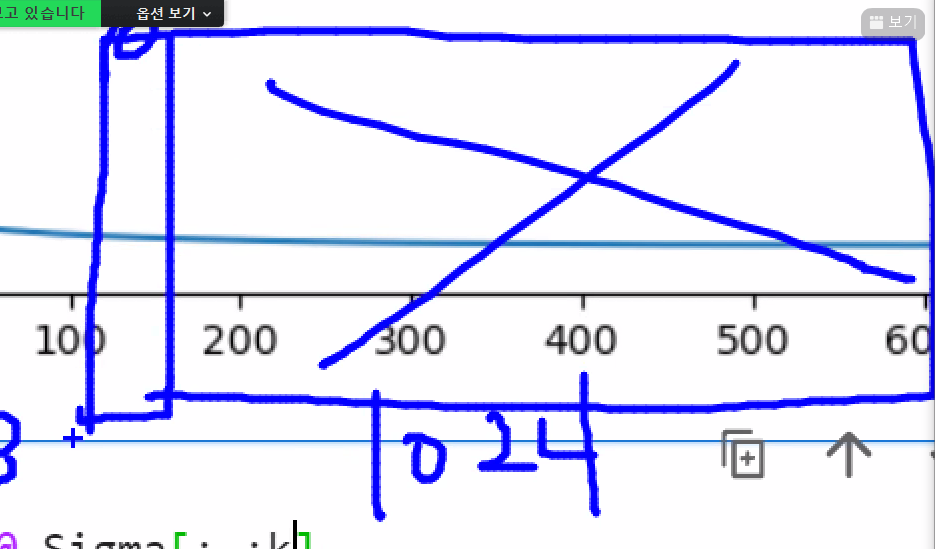

s값 세로는 그대로 768 다 쓰고 왼쪽에서부터 10개만 쓰겠다
먼소리여...ㅠㅠ

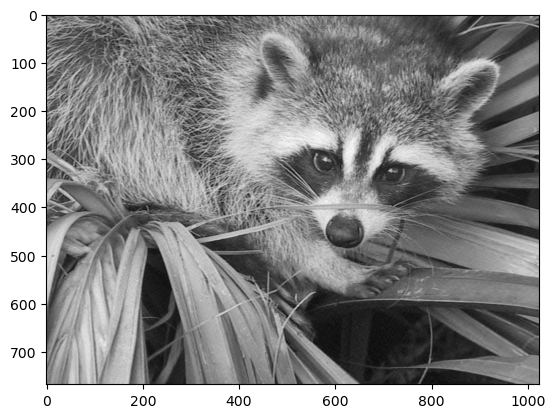

In [68]:
k = 200
approx = U @ Sigma[:,:k] @ Vt[:k, :]
plt.imshow(approx,cmap='gray')
plt.show()

n차원 배열이 있는 제품
 RGB 다 해보는 법

이미지 가져오는 방법

In [69]:
from PIL import Image

In [70]:
img_path = 'img01.jpeg'
# 같은 경로에 있으니 파일명만 쓰면 돼여

<function matplotlib.pyplot.show(close=None, block=None)>

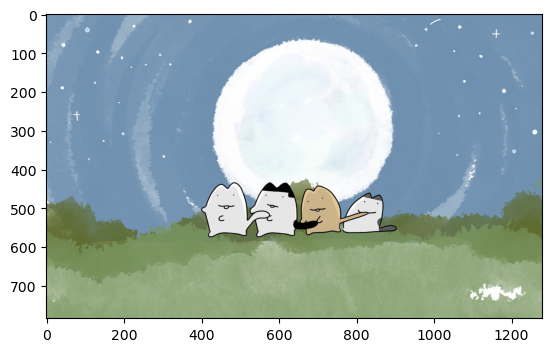

In [71]:
img = Image.open(img_path)
# img = Image.open(img_path).convert('L') 흑백으로 불러오는거
plt.imshow(img)
plt.show

In [72]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

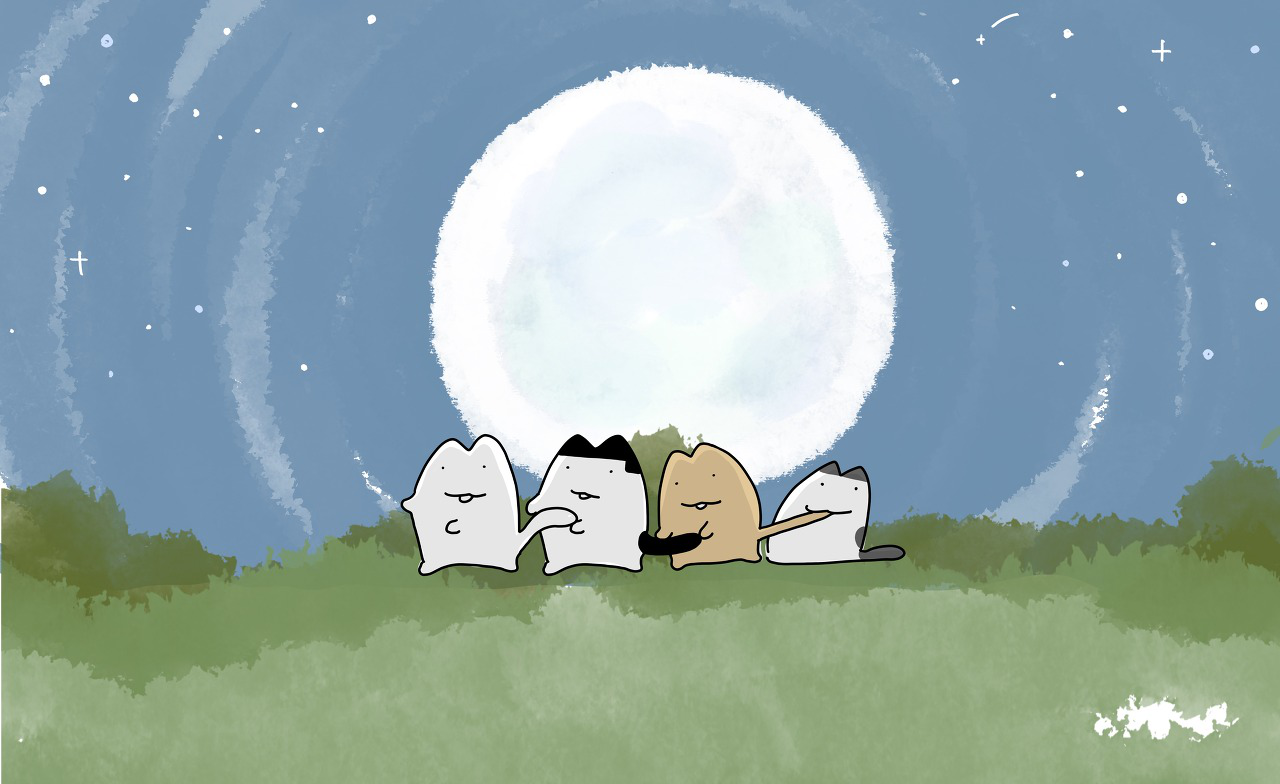

In [73]:
img
# 얜 그냥 이미지
# 위에 plt.show로 하면 ndarray

In [74]:
np.array(img)

array([[[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[120, 151, 180],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       ...,

       [[249, 255, 250],
        [168, 180, 158],
        [140, 158, 120],
        ...,
        [159, 180, 141],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 250],
        [168, 180, 158],
        [141, 159, 121],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 250],
        [169, 181, 159],
        [142, 160, 122],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]]

In [77]:
# pip 설치하고
# > pip install opencv-python
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # BGR로 돼있는 걸 RGB로
# 이거 머한거여?!

In [78]:
img

array([[[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[121, 152, 181],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       [[120, 151, 180],
        [120, 151, 180],
        [120, 151, 180],
        ...,
        [113, 146, 177],
        [113, 146, 177],
        [113, 146, 177]],

       ...,

       [[249, 255, 244],
        [167, 181, 158],
        [141, 157, 120],
        ...,
        [159, 180, 141],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 244],
        [167, 181, 158],
        [142, 158, 121],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]],

       [[249, 255, 244],
        [168, 182, 159],
        [143, 159, 122],
        ...,
        [160, 181, 142],
        [159, 180, 141],
        [158, 179, 140]]